# Machine Learning

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import calendar as cal
#import workalendar
from workalendar.america import Brazil
from datetime import date
from sklearn.cross_validation import train_test_split
%store -r orders_v2

C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Machine learning library/functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
from sklearn import linear_model
import sklearn.linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Additional librariers used for modeling and evaluation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


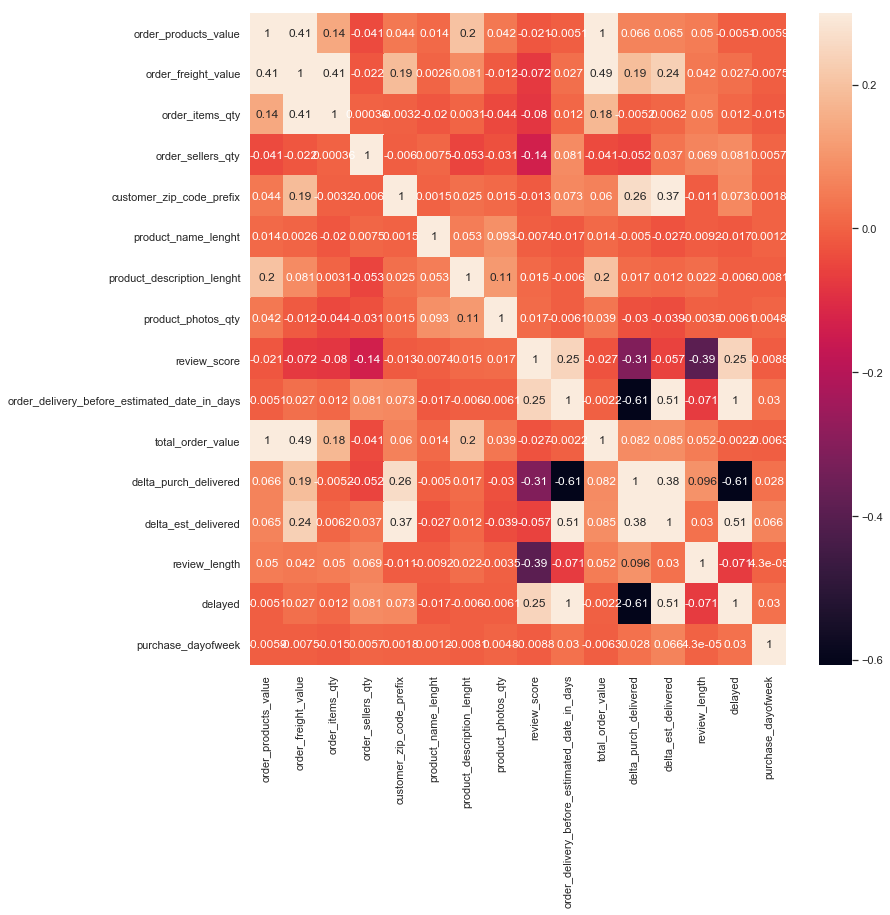

In [3]:
sns.set(font_scale=1)
corr = orders_v2.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12,12))
    ax = sns.heatmap(corr, vmax=.3, annot=True)

In [4]:
orders_v2.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_id', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'order_delivery_before_estimated_date_in_days', 'total_order_value',
       'delta_purch_delivered', 'delta_est_delivered', 'review_length',
       'delayed', 'purchase_dayofweek'],
      dtype='object')

In [5]:
orders=orders_v2[['order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_city', 'customer_state',
       'product_category_name','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'review_score',
       'delta_purch_delivered', 'delta_est_delivered',
       'delayed']]

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
order_status                     100000 non-null object
order_products_value             100000 non-null float64
order_freight_value              100000 non-null float64
order_items_qty                  100000 non-null int64
order_sellers_qty                100000 non-null int64
order_purchase_timestamp         100000 non-null datetime64[ns]
order_aproved_at                 99982 non-null datetime64[ns]
order_estimated_delivery_date    100000 non-null datetime64[ns]
order_delivered_customer_date    97595 non-null datetime64[ns]
customer_city                    100000 non-null object
customer_state                   100000 non-null object
product_category_name            100000 non-null object
product_name_lenght              100000 non-null int64
product_description_lenght       100000 non-null int64
product_photos_qty               100000 non-null int64
review_score           

In [7]:
# change folat datatypes to int
orders['order_products_value']=orders['order_products_value'].astype(int)
orders['order_freight_value']= orders['order_freight_value'].astype(int)

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
max(orders.order_products_value)

13440

In [9]:
#bin product values in 10s
bins =  np.arange(10,13500,10)
ranges = pd.DataFrame({'Column1':bins})
ranges['START'] = (ranges.Column1.shift(1)+1).fillna(1)
ranges.index = pd.IntervalIndex.from_arrays(ranges.START, ranges.Column1, closed='both')
ranges = pd.DataFrame(ranges)

In [10]:
orders['order_products_value']= orders.order_products_value.map(ranges['Column1'])

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
orders.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,review_score,delta_purch_delivered,delta_est_delivered,delayed
0,delivered,350,13,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,Guaratuba,PR,health beauty,51,625,1,5,5,42,36.0
1,delivered,20,15,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02,2017-09-13 20:17:41.296915,Uberlandia,MG,computers accessories,44,1428,2,5,4,22,18.0
2,delivered,240,18,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07,2017-02-06 15:43:04.758566,Itapevi,SP,auto,55,637,1,5,6,35,28.0
3,delivered,30,18,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03,2018-04-03 20:36:43.778451,Goiania,GO,bed bath table,55,617,1,4,23,22,-1.0
4,delivered,300,47,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24,2017-05-04 18:47:45.721758,Recife,PE,furniture decor,49,558,2,5,14,33,19.0



### Feature Hypothesis : 

#### What are the expected reletionships of independent variables with review score?
1. order_items_qty ("+") - if consumer gets more than one item from the same seller, it should mean that he/she knows the quality of the good. Therefore, increase in item quantity should increase review score
2. product_description_lenght ("+") - buyer having more information about buying product should have positive relationship with review score
3. product_photos_qty ("+")
4. product_name_lenght ('unknown')- shorter names sometimes can be ambiguous or can be easy to understand,so relationship with review score is unknown at this point
5. delivery_accuracy ("+") - item coming on time or earlier that it was described should have positive relationship with review score
6. order_products_value ("-") - more expensive perhaps means better quality or higher expectation towards order fulfilment;
7. order_freight_value ("-") - more frieght means more expectation towards delivery accuracy


In [12]:
# load Brazil's working calendar
cal= Brazil()

In [13]:
# function to create new features
def feature_engineering(df):

        df['estimated_delivery_time_wd']=df.apply(lambda x: cal.get_working_days_delta(x.order_aproved_at,x.order_estimated_delivery_date), axis=1)
        df['actual_delivery_time_wd'] = df.apply(lambda x: cal.get_working_days_delta(x.order_aproved_at,x.order_delivered_customer_date), axis=1)
        df['delivery_time_delta_wd'] = df.actual_delivery_time_wd - df.estimated_delivery_time_wd

        #df['is_late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date
    
        df['average_product_value'] = df.order_products_value / df.order_items_qty

        df['total_order_value'] = df.order_products_value + df.order_freight_value
        
        df['order_freight_ratio'] = df.order_freight_value / df.order_products_value
        
        df['purchase_dayofweek'] = df.order_purchase_timestamp.dt.dayofweek
        
        df = df.drop(['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                     'order_delivered_customer_date','delta_purch_delivered'], axis=1)
    
        return df

In [14]:
orders_FE1 = feature_engineering(orders)

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [15]:
orders_FE1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
order_status                  100000 non-null object
order_products_value          100000 non-null int32
order_freight_value           100000 non-null int32
order_items_qty               100000 non-null int64
order_sellers_qty             100000 non-null int64
customer_city                 100000 non-null object
customer_state                100000 non-null object
product_category_name         100000 non-null object
product_name_lenght           100000 non-null int64
product_description_lenght    100000 non-null int64
product_photos_qty            100000 non-null int64
review_score                  100000 non-null int64
delta_est_delivered           100000 non-null Int64
delayed                       97595 non-null float64
estimated_delivery_time_wd    100000 non-null int64
actual_delivery_time_wd       100000 non-null int64
delivery_time_delta_wd        100000 non-null int64
a

In [16]:
# fill null values of delayed columns with 0
orders_FE1['delayed'] = orders_FE1['delayed'].fillna(0)

In [17]:
orders_FE1.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,...,review_score,delta_est_delivered,delayed,estimated_delivery_time_wd,actual_delivery_time_wd,delivery_time_delta_wd,average_product_value,total_order_value,order_freight_ratio,purchase_dayofweek
0,delivered,350,13,1,1,Guaratuba,PR,health beauty,51,625,...,5,42,36.0,30,3,-27,350.0,363,0.037143,1
1,delivered,20,15,1,1,Uberlandia,MG,computers accessories,44,1428,...,5,22,18.0,16,3,-13,20.0,35,0.750000,5
2,delivered,240,18,1,1,Itapevi,SP,auto,55,637,...,5,35,28.0,26,5,-21,240.0,258,0.075000,0
3,delivered,30,18,1,1,Goiania,GO,bed bath table,55,617,...,4,22,-1.0,17,17,0,30.0,48,0.600000,6
4,delivered,300,47,1,1,Recife,PE,furniture decor,49,558,...,5,33,19.0,20,6,-14,300.0,347,0.156667,3


In [18]:
orders_FE1.columns

Index(['order_status', 'order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'review_score',
       'delta_est_delivered', 'delayed', 'estimated_delivery_time_wd',
       'actual_delivery_time_wd', 'delivery_time_delta_wd',
       'average_product_value', 'total_order_value', 'order_freight_ratio',
       'purchase_dayofweek'],
      dtype='object')

In [19]:
# normalize numerical column values
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
normalizer = preprocessing.Normalizer()
numerical = ['order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'delta_est_delivered', 'delayed', 'estimated_delivery_time_wd',
       'actual_delivery_time_wd', 'delivery_time_delta_wd',
       'average_product_value', 'total_order_value', 'order_freight_ratio',
       'purchase_dayofweek']
X = orders_FE1.loc[:,numerical]
scaled_values = normalizer.fit_transform(X.values)
Xscaled = pd.DataFrame(scaled_values,columns=numerical)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'delta_est_delivered', 'delayed', 'estimated_delivery_time_wd',
       'actual_delivery_time_wd', 'delivery_time_delta_wd',
       'average_product_value', 'total_order_value', 'order_freight_ratio',
       'purchase_dayofweek']
X = orders_FE1.loc[:,numerical]
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X.values) 
Xscaled = pd.DataFrame(scaled_values,columns=numerical)

In [20]:
# encode categorized data
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
orders_FE1['order_status'] = lb_make.fit_transform(orders_FE1['order_status'])
orders_FE1['product_category_name'] = lb_make.fit_transform(orders_FE1['product_category_name'])
orders_FE1['customer_city'] = lb_make.fit_transform(orders_FE1['customer_city'])
orders_FE1['customer_state'] = lb_make.fit_transform(orders_FE1['customer_state'])

In [21]:
#concatinate numerical and categarised columns
#orders_FE1= pd.concat([orders_FE1['review_score'],Xscaled],axis=1)
orders_FE1= pd.concat([orders_FE1[['order_status','customer_state','customer_city','product_category_name','review_score']],Xscaled],axis=1)

In [ ]:
sns.set(font_scale=1)
corr = orders_FE1.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12,12))
    ax = sns.heatmap(corr, vmax=.3, annot=True)

In [22]:
# prepare data for Model fit
X=orders_FE1.drop('review_score', axis=1)
y=orders_FE1['review_score']

In [23]:
#Split data in test and train datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)

####  Linear regression model

In [25]:
lin_reg=LinearRegression()
lin_reg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lin_reg.score(Xtrain,ytrain)

0.12283034338824406

#### Random Forest regressor

In [27]:
rf_reg=RandomForestRegressor()
rf_reg.fit(Xtrain,ytrain)
rf_reg.score(Xtrain,ytrain)

0.8507389941895652

In [28]:
rf_reg.score(Xtest,ytest)

0.18462842014260072

#### Random Forest regressor with GridSearchCV

In [29]:
parameters = {"n_estimators": [5,10,20,40,60],"max_features":['auto','sqrt','log2'],"max_depth":[10,15,20]}
#rf1_reg = RandomForestRegressor(n_jobs=-1)

In [30]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [31]:
grid_search.fit(Xtrain, ytrain)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 40, 60], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [32]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 60}

In [33]:
rf1_reg= grid_search.best_estimator_

In [34]:
score=rf1_reg.score(Xtest,ytest)

In [35]:
score

0.2631284544910203

#### ElasticNet with GridSearchCV

In [36]:
parameters ={"alpha": np.arange(0.10,0.11,.01), "l1_ratio":  np.arange(0.1,0.11,.01),"max_iter":[1000]}

In [37]:
from sklearn.linear_model import LinearRegression, ElasticNet
en_reg= ElasticNet()

In [38]:
grid_search = GridSearchCV(estimator = en_reg, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [39]:
grid_search.fit(Xtrain, ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([0.1]), 'l1_ratio': array([0.1]), 'max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [40]:
grid_search.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}

In [41]:
rf1_reg= grid_search.best_estimator_

In [42]:
score=rf1_reg.score(Xtest,ytest)

In [43]:
score

0.029281696764038245